In [1]:
import pandas as pd    #  pip install pandas

In [2]:
from pathlib import Path

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import seaborn as sns
%matplotlib inline 

In [140]:
def funcPositive(x):
    if x >= 0.66:
        return 'Positive'
    elif x >= 0.33:
        return 'Neutral'
    else:
        return 'Negative'

In [381]:
df = pd.read_csv('/Users/romanchepenko/Desktop/diplom/duma_analysis/data/duma_csv/2022.csv')
df = df.drop(columns = ['Unnamed: 0'],axis = 1)
patternDel = "Думы [А-Я|A-Z]. [А-Я|A-Z]."
filter = df['name'].str.contains(patternDel)
df = df[~filter]
df['pos'] = df['senti_score'].replace(to_replace ='[\]\[]', value = '', regex = True)
df[['positive_prob','negative_prob']] = df['pos'].str.split(' ', n=1, expand=True)
df = df.drop(columns = ['senti_score', 'pos'],axis = 1)
df['text'] = df['text'].replace(to_replace ='\n', value = '', regex = True)
df['positive_prob'] = pd.to_numeric(df['positive_prob'])
df['negative_prob'] = pd.to_numeric(df['negative_prob'])
df['positive'] = df['positive_prob'].apply(funcPositive)
df['Norm'] = df['text_w_length'].apply(lambda x: 'True' if x <= 3500 else 'False')
df = df[df['Norm'] != 'False']
df = df.drop(columns = ['Norm'],axis = 1)
df['performances'] = df.groupby(['name'])['text'].transform('count')
df.to_csv('newCSV_2022.csv')
df

,name,text,text_length,text_w_length,positive_prob,negative_prob,positive,performances
1,Председательствующий.,"Добрый день, уважаемые коллеги! Просьба зарег...",718,90,0.629782,0.370218,Neutral,2615
3,Председательствующий.,"Уважаемые коллеги, слово для выступления пред...",141,13,0.926867,0.073133,Positive,2615
4,Володин В. В.,", Председатель Государственной Думы, фракция ""...",9145,1218,0.787122,0.212878,Positive,1
5,Председательствующий.,"Уважаемые коллеги, слово для выступления пред...",137,15,0.950982,0.049018,Positive,2615
6,Зюганов Г. А.,", руководитель фракции КПРФ. Уважаемые коллеги...",2509,357,0.980848,0.019152,Positive,19
...,...,...,...,...,...,...,...,...
5732,Председательствующий.,"Коллеги, есть вопросы к Александру Дмитриевич...",200,25,0.697634,0.302366,Positive,2615
5733,Председательствующий.,"Есть. Вы выступить хотите?Пожалуйста, включит...",138,16,0.432368,0.567632,Neutral,2615
5734,Новичков Н. В.,"Уважаемый Вячеслав Викторович, уважаемые колл...",741,109,0.998648,0.001352,Positive,9
5735,Председательствующий.,"Спасибо, Николай Владимирович.Пожалуйста, Але...",72,7,0.919338,0.080662,Positive,2615


/Users/romanchepenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


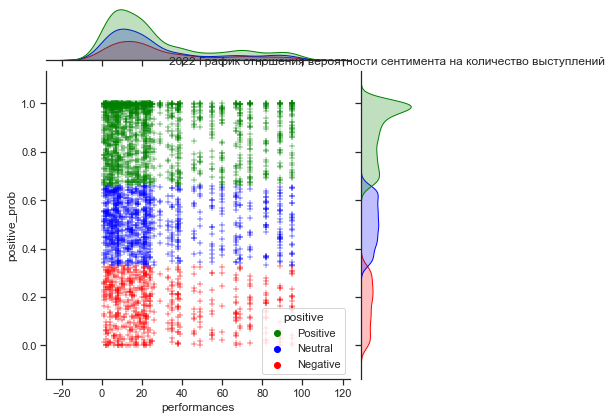

In [382]:
paletteCol = {"Positive": "green", "Neutral": "blue", "Negative": "red"}
df = df[df['name'] != 'Председательствующий.']
sns.jointplot("performances", "positive_prob", data=df, hue="positive", palette=paletteCol, marker='+');
plt.title("2022 График отношения вероятности сентимента на количество выступлений")
plt.ylabel("Сентимент")
plt.xlabel("Количество выступлений");
plt.savefig("posit_perfomance_2022.png")

/Users/romanchepenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


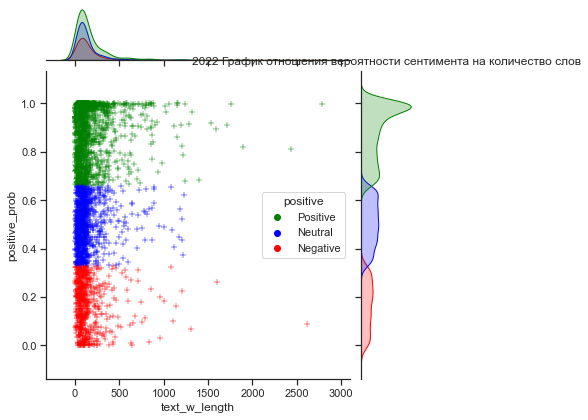

In [383]:
sns.jointplot("text_w_length", "positive_prob", data=df, hue="positive", palette=paletteCol, marker='+');
plt.title("2022 График отношения вероятности сентимента на количество слов")
plt.ylabel("Сентимент")
plt.xlabel("Количество слов");
plt.savefig("posit_words_2022.png")

/var/folders/56/yw0nw4q15bzf2bfcm7wgd74w0000gn/T/ipykernel_22030/2772722102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNorm['Norm'] = dfNorm['text_w_length'].apply(lambda x: 'True' if x <= 1000 else 'False')
/Users/romanchepenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


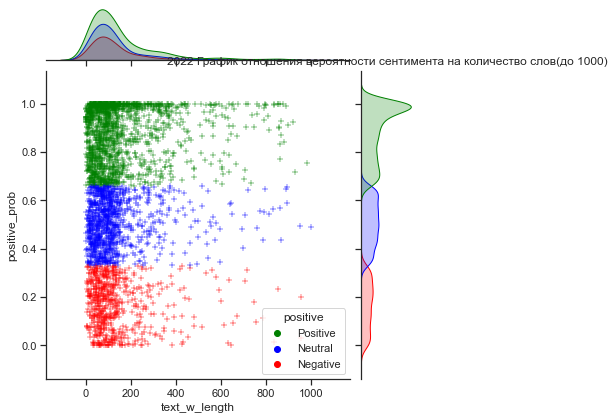

In [384]:
dfNorm = df
dfNorm['Norm'] = dfNorm['text_w_length'].apply(lambda x: 'True' if x <= 1000 else 'False')
dfNorm = dfNorm[dfNorm['Norm'] != 'False']
dfNorm = dfNorm.drop(columns = ['Norm'],axis = 1)
sns.jointplot("text_w_length", "positive_prob", data=dfNorm, hue="positive", palette=paletteCol, marker='+');
plt.title("2022 График отношения вероятности сентимента на количество слов(до 1000)")
plt.ylabel("Сентимент")
plt.xlabel("Количество слов");
plt.savefig("posit_words1k_2022.png")

/var/folders/56/yw0nw4q15bzf2bfcm7wgd74w0000gn/T/ipykernel_22030/1166806733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNorm['Norm'] = dfNorm['text_w_length'].apply(lambda x: 'True' if x <= 500 else 'False')
/Users/romanchepenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


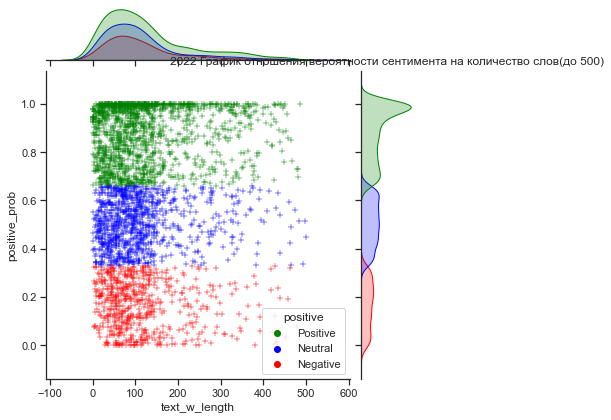

In [385]:
dfNorm = df
dfNorm['Norm'] = dfNorm['text_w_length'].apply(lambda x: 'True' if x <= 500 else 'False')
dfNorm = dfNorm[dfNorm['Norm'] != 'False']
dfNorm = dfNorm.drop(columns = ['Norm'],axis = 1)
sns.jointplot("text_w_length", "positive_prob", data=dfNorm, hue="positive", palette=paletteCol, marker='+');
plt.title("2022 График отношения вероятности сентимента на количество слов(до 500)")
plt.ylabel("Сентимент")
plt.xlabel("Количество слов");
plt.savefig("posit_words500_2022.png")

/Users/romanchepenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


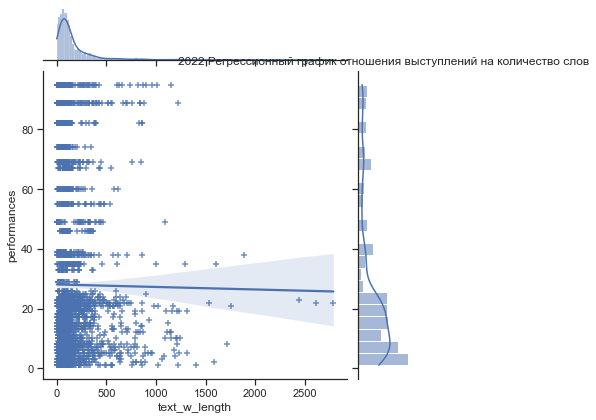

In [386]:
sns.jointplot("text_w_length", "performances",  data=df, kind='reg', palette=paletteCol, marker='+');
plt.title("2022 Регрессионный график отношения выступлений на количество слов")
plt.ylabel("Выступления")
plt.xlabel("Количество слов");
plt.savefig("reg_plot_2022.png")

/Users/romanchepenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


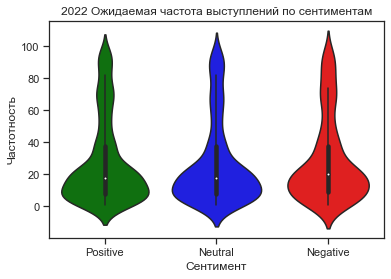

In [387]:
sns.violinplot("positive", "performances", data=df, palette=paletteCol);
plt.title("2022 Ожидаемая частота выступлений по сентиментам")
plt.ylabel("Частотность")
plt.xlabel("Сентимент");
plt.savefig("violin_plot_2022.png")

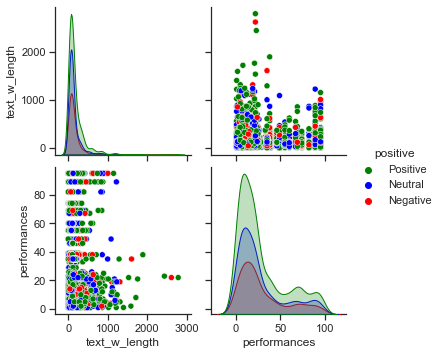

In [388]:
# убираем несколько колонок
dfMattix = df
dfMattix = dfMattix.drop(columns = ['positive_prob', 'negative_prob', 'text_length'],axis = 1)
sns.set_theme(style="ticks")
sns.pairplot(dfMattix, hue="positive", palette=paletteCol)
plt.savefig("matrix_without_2022.png")

In [ ]:

patternDel = "Председательствующий."
filter = df['name'].str.contains(patternDel)
dff = df[~filter]
df1 = dff['name'].value_counts()
df1[:20].plot(kind='kde')
plt.title("Плотность выступлений за 2001 год")
plt.xlabel("Выступления")
plt.ylabel("Плотность")
plt.savefig('speeches_kde_2001.png')

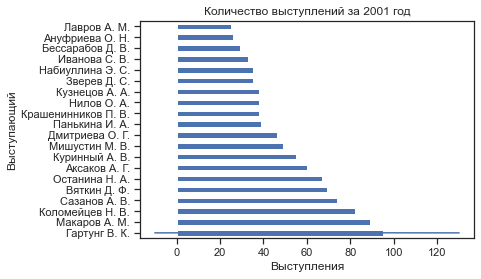

In [389]:

plot2 = df1[:20].plot(kind='barh')
plt.title("Количество выступлений за 2001 год")
plt.xlabel("Выступления")
plt.ylabel("Выступающий")
plt.savefig('top_speaker_2002.png')